# 第6章: 機械学習

本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

## 50. データの入手・整形

News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

- ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
- 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
- 抽出された事例をランダムに並び替える．
- 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
!curl -o ./data/nlp_100_50_59/NewsAggregatorDataset.zip --create-dirs https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27.8M  100 27.8M    0     0   885k      0  0:00:32  0:00:32 --:--:-- 1292k 53501      0  0:09:06 --:--:--  0:09:06 5344165k      0  0:01:18  0:00:05  0:01:13  421k


In [2]:
!unzip ./data/nlp_100_50_59/NewsAggregatorDataset.zip -d ./data/nlp_100_50_59/

Archive:  ./data/nlp_100_50_59/NewsAggregatorDataset.zip
replace ./data/nlp_100_50_59/2pageSessions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
!head -n 5 ./data/nlp_100_50_59/newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [3]:
import pandas as pd
articles = pd.read_csv('./data/nlp_100_50_59/newsCorpora.csv', delimiter='\t', header=None)

In [4]:
articles.head(5)

,0,1,2,3,4,5,6,7
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [5]:
articles.columns = ['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp']

In [6]:
articles = articles.query('publisher in ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]')

In [7]:
import string
import re

def preprocess_text(text):
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(table)
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    
    return text

In [8]:
articles['title'] = articles['title'].map(lambda x: preprocess_text(x))

In [9]:
from sklearn.model_selection import train_test_split
train, valid_test = train_test_split(articles, test_size=0.2, shuffle=True, random_state=123)
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123)

train.to_csv('./data/nlp_100_50_59/train.txt', sep='\t', index=False)
valid.to_csv('./data/nlp_100_50_59/valid.txt', sep='\t', index=False)
test.to_csv('./data/nlp_100_50_59/test.txt', sep='\t', index=False)

In [10]:
train = pd.read_csv('./data/nlp_100_50_59/train.txt', delimiter='\t')
valid = pd.read_csv('./data/nlp_100_50_59/valid.txt', delimiter='\t')
test = pd.read_csv('./data/nlp_100_50_59/test.txt', delimiter='\t')
print(train['category'].value_counts())
print(valid['category'].value_counts())
print(test['category'].value_counts())

b    4481
e    4262
t    1190
m     739
Name: category, dtype: int64
b    568
e    513
t    164
m     89
Name: category, dtype: int64
b    578
e    504
t    170
m     82
Name: category, dtype: int64


## 51. 特徴量抽出

学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=10)

x_train = vec_tfidf.fit_transform(train['title'])
x_valid = vec_tfidf.transform(valid['title'])
x_test = vec_tfidf.transform(test['title'])

x_train = pd.DataFrame(x_train.toarray(), columns=vec_tfidf.get_feature_names())
x_valid = pd.DataFrame(x_valid.toarray(), columns=vec_tfidf.get_feature_names())
x_test = pd.DataFrame(x_test.toarray(), columns=vec_tfidf.get_feature_names())

y_train = train['category']
y_valid = valid['category']
y_test = test['category']

x_train.to_csv('./data/nlp_100_50_59/x_train.csv', sep='\t', index=False)
y_train.to_csv('./data/nlp_100_50_59/y_train.csv', sep='\t', index=False, header=True)
x_valid.to_csv('./data/nlp_100_50_59/x_valid.csv', sep='\t', index=False)
y_valid.to_csv('./data/nlp_100_50_59/y_valid.csv', sep='\t', index=False, header=True)
x_test.to_csv('./data/nlp_100_50_59/x_test.csv', sep='\t', index=False)
y_test.to_csv('./data/nlp_100_50_59/y_test.csv', sep='\t', index=False, header=True)

## 52. 学習

51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [12]:
from sklearn.linear_model import LogisticRegression

x_train = pd.read_csv('./data/nlp_100_50_59/x_train.csv', delimiter='\t')
y_train = pd.read_csv('./data/nlp_100_50_59/y_train.csv', delimiter='\t')

lg = LogisticRegression(random_state=123)
lg.fit(x_train, y_train)

/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=123)

## 53. 予測

52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [13]:
import numpy as np

def score_lg(lg, x):
    return [np.max(lg.predict_proba(x), axis=1), lg.predict(x)]

In [14]:
test_pred = score_lg(lg, x_test)
test_pred

[array([0.51456587, 0.96788825, 0.80738194, ..., 0.55189056, 0.95498245,
        0.9523874 ]), array(['b', 'b', 'e', ..., 't', 'b', 'b'], dtype=object)]

## 54. 正解率の計測

52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [15]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, score_lg(lg, x_train)[1])
test_accuracy = accuracy_score(y_test, test_pred[1])
print(train_accuracy)
print(test_accuracy)

0.9211019490254873
0.8755622188905547


## 55. 混同行列の作成

52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn
seaborn.set()

train_cm = confusion_matrix(y_train, score_lg(lg, x_train)[1])
seaborn.heatmap(train_cm, annot=True, cmap='Blues', fmt="d")

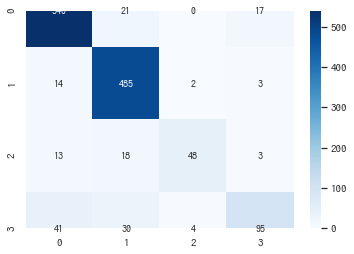

In [17]:
test_cm = confusion_matrix(y_test, test_pred[1])
seaborn.heatmap(test_cm, annot=True, cmap='Blues', fmt="d")

## 56. 適合率，再現率，F1スコアの計測

52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

true = y_test
pred = test_pred[1]

precision = {
    'precision': precision_score(true, pred, average=None, labels=['b', 'e', 't', 'm']),
    'micro': precision_score(true, pred, average='micro'),
    'macro': precision_score(true, pred, average='macro')
}
recall = {
    'recall': recall_score(true, pred, average=None, labels=['b', 'e', 't', 'm']),
    'micro': recall_score(true, pred, average='micro'),
    'macro': recall_score(true, pred, average='macro')
}
f1 = {
    'f1': f1_score(true, pred, average=None, labels=['b', 'e', 't', 'm']),
    'micro': f1_score(true, pred, average='micro'),
    'macro': f1_score(true, pred, average='macro')
}
print(precision)
print(recall)
print(f1)

{'precision': array([0.88815789, 0.87545126, 0.80508475, 0.88888889]), 'micro': 0.8755622188905547, 'macro': 0.8643956982315872}
{'recall': array([0.93425606, 0.96230159, 0.55882353, 0.58536585]), 'micro': 0.8755622188905547, 'macro': 0.7601867564338025}
{'f1': array([0.91062395, 0.9168242 , 0.65972222, 0.70588235]), 'micro': 0.8755622188905547, 'macro': 0.798263179449463}


precision は、Aと予測したデータのうち実際にAであるものの割合。recall は、実際にAであるもののうち、Aと予測されたものの割合。

macro-f1 はクラスごとのf値の平均で、micro-f1 は TP, FN, FP, TN を合計してからf値を計算したもの。

macro では全てのクラスのメトリックを個別で計算したあと平均を取るので、クラスの違いは全体では考慮されない。一方で、micro では全てのクラスの寄与をクラスサイズを反映した形で集約している。

簡単に言えば、macro-f1 はクラスサイズが反映されず、micro-f1 では反映される。なので、クラスの不均衡がある場合は、micro の方が正当性のある結果が出る。

## 57. 特徴量の重みの確認

52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [19]:
lg.classes_

array(['b', 'e', 'm', 't'], dtype=object)

In [20]:
x_train.columns.values

array(['0m', '0nd', '0s', ..., 'zac efron', 'zendaya', 'zone'],
      dtype=object)

In [21]:
bests, worsts = [], []
for c, coef in zip(lg.classes_, lg.coef_):
    bests.append(x_train.columns.values[np.argsort(coef)[::-1]])
    worsts.append(x_train.columns.values[np.argsort(coef)])
best_pd = pd.DataFrame(bests, index=['b', 'e', 'm', 't'])
worst_pd = pd.DataFrame(worsts, index=['b', 'e', 'm', 't'])

In [22]:
best_pd

,0,1,2,3,4,5,6,7,8,9,...,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479
b,fed,bank,ecb,china,stocks,euro,oil,yellen,dollar,ukraine,...,star,study,microsoft,her,she,and,apple,aereo,video,ebola
e,kardashian,chris,movie,she,star,kim,film,her,jay,wedding,...,ceo,data,could,gm,study,says,china,google,update,us
m,ebola,study,fda,cancer,mers,drug,cdc,doctors,could,cases,...,big,twitter,tv,bank,deal,apple,google,ceo,gm,facebook
t,google,apple,facebook,microsoft,climate,tesla,nasa,gm,heartbleed,comcast,...,still,ecb,ukraine,drug,cancer,percent,american,fed,stocks,her


In [23]:
worst_pd

,0,1,2,3,4,5,6,7,8,9,...,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479
b,ebola,video,aereo,apple,and,she,her,microsoft,study,star,...,ukraine,dollar,yellen,oil,euro,stocks,china,ecb,bank,fed
e,us,update,google,china,says,study,gm,could,data,ceo,...,wedding,jay,her,film,kim,star,she,movie,chris,kardashian
m,facebook,gm,ceo,google,apple,deal,bank,tv,twitter,big,...,cases,could,doctors,cdc,drug,mers,cancer,fda,study,ebola
t,her,stocks,fed,american,percent,cancer,drug,ukraine,ecb,still,...,comcast,heartbleed,gm,nasa,tesla,climate,microsoft,facebook,apple,google


## 58. 正則化パラメータの変更

ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [26]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

result = []
for c in tqdm(np.logspace(-5, 5, 11, base=10)):
    lg = LogisticRegression(random_state=123, max_iter=10000, C=c)
    lg.fit(x_train, y_train)

    train_pred = [np.max(lg.predict_proba(x_train), axis=1), lg.predict(x_train)]
    valid_pred = [np.max(lg.predict_proba(x_valid), axis=1), lg.predict(x_valid)]
    test_pred = [np.max(lg.predict_proba(x_test), axis=1), lg.predict(x_test)]

    train_accuracy = accuracy_score(y_train, train_pred[1])
    valid_accuracy = accuracy_score(y_valid, valid_pred[1])
    test_accuracy = accuracy_score(y_test, test_pred[1])

    result.append([c, train_accuracy, valid_accuracy, test_accuracy])

  0%|          | 0/11 [00:00<?, ?it/s]/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
  9%|▉         | 1/11 [00:02<00:25,  2.57s/it]/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
 18%|█▊        | 2/11 [00:04<00:20,  2.31s/it]/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
 27%|██▋       | 3/11

In [27]:
result_pd = pd.DataFrame(result, columns=['c', 'train_accuracy', 'valid_accuracy', 'test_accuracy'])

In [28]:
result_pd

,c,train_accuracy,valid_accuracy,test_accuracy
0,0.00001,0.419884,0.425787,0.433283
1,0.00010,0.419884,0.425787,0.433283
2,0.00100,0.519115,0.518741,0.520240
3,0.01000,0.763400,0.760120,0.750375
4,0.10000,0.804254,0.798351,0.788606
5,1.00000,0.921196,0.881559,0.875562
6,10.00000,0.974232,0.884558,0.877811
7,100.00000,0.995596,0.869565,0.850075
8,1000.00000,0.998126,0.847076,0.830585
9,10000.00000,0.998220,0.835832,0.820840


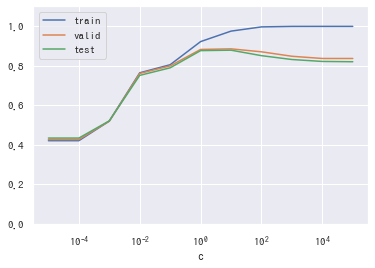

In [29]:
import matplotlib.pyplot as plt
plt.plot(result_pd['c'], result_pd['train_accuracy'], label='train')
plt.plot(result_pd['c'], result_pd['valid_accuracy'], label='valid')
plt.plot(result_pd['c'], result_pd['test_accuracy'], label='test')
plt.ylim(0, 1.1)
plt.xscale('log')
plt.xlabel('c')
plt.legend()
plt.show()

## 59. ハイパーパラメータの探索

学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [30]:
import optuna

In [31]:
def objective_lg(trial):
    l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
    c = trial.suggest_loguniform('c', 1e-4, 1e4)
    
    lg = LogisticRegression(
        random_state=123, 
        penalty='elasticnet',
        solver='saga',
        l1_ratio=l1_ratio,
        C=c
    )
    lg.fit(x_train, y_train)
    valid_accuracy = accuracy_score(y_valid, lg.predict(x_valid))
    
    return valid_accuracy

In [33]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_lg, n_trials=10)

/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[I 2020-08-12 17:54:48,193] Trial 0 finished with value: 0.8845577211394303 and parameters: {'l1_ratio': 0.4588873943813926, 'c': 7.356428097287914}. Best is trial 0 with value: 0.8845577211394303.
/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[I 2020-08-12 17:56:12,804] Trial 1 finished with value: 0.8860569715142429 and parameters: {'l1_ratio': 0.7749612478164204, 'c': 2.741464933879578}. Best is trial 1 with value: 0.8860569715142429.
/Users/uchi_k/.pyenv/versions/anaconda

[I 2020-08-12 09:33:23,826] Trial 109 finished with value: 0.8928035982008995 and parameters: {'l1_ratio': 0.32409813572255125, 'c': 2.3493945440724393}. Best is trial 109 with value: 0.8928035982008995.

In [34]:
trial = study.best_trial
print(trial.value)
for key, value in trial.params.items():
    print('{0} {1}'.format(key, value))

0.8860569715142429
l1_ratio 0.7749612478164204
c 2.741464933879578


In [37]:
lg = LogisticRegression(
    random_state=123,
    l1_ratio=trial.params['l1_ratio'],
    C=trial.params['c'],
    penalty='elasticnet',
    solver='saga'
)
lg.fit(x_train, y_train)

test_accuracy = accuracy_score(y_test, lg.predict(x_test))
print(test_accuracy)

/Users/uchi_k/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.883808095952024
